In [3]:
load("dataset.RData")
library(tidyverse)
library(lubridate)
library(forcats)

total_seats_per_company <- dataset %>%
    filter(contract_status == "Active") %>%
    distinct(owner_id,entitlement_id,.keep_all = TRUE) %>%
    group_by(owner_id) %>%
    mutate(total_seats = sum(purchased_seat_quantity)) %>%
    select(owner_id,entitlement_id,total_seats,purchased_seat_quantity)


product_weekly_usage <- dataset %>%
    filter(!is.na(product_line_name)) %>%
    group_by(owner_id,product_line_name,dt) %>%
    summarise(weekly_seats = sum(purchased_seat_quantity),
              weekly_sessions = sum(sessions)) %>%
    ungroup()

#### since there is an increasing usage of almost all products, we only observe the last four month

In [ ]:
observed_date <- ymd("2017-07-01")

In [12]:
data_after_2017_Jul <- product_weekly_usage %>%
    filter(dt > observed_date)

product_usage <- data_after_2017_Jul %>% 
    group_by(owner_id,product_line_name) %>%
    summarise(mean_seats = mean(weekly_seats),
              sum_sessions = sum(weekly_sessions)) %>%
    mutate(sessions_seats = sum_sessions/mean_seats)

num_months <- interval(observed_date,max(dataset$dt))/ months(1)
cat("number of month observed is ",round(num_months,2),"\n\n")
product_popularity <- product_usage %>%
    group_by(product_line_name) %>%
    summarise(total_sessions = sum(sum_sessions)) %>%
    arrange(desc(total_sessions)) %>%
    mutate(rank = seq(1,n()))

cat("Product popularity ranked by total sessions over the last ", round(num_months,2)," months")
product_popularity

number of month observed is  3.65 

Product popularity ranked by total sessions over the last  3.65  months

product_line_name,total_sessions,rank
ACD,1832094,1
RVT,1626939,2
INVPROSA,913452,3
CIV3D,517440,4
AMECH_PP,395967,5
NAVMAN,299484,6
ARCHDESK,242307,7
3DSMAX,219245,8
BLDSYS,136324,9
MAYA,90183,10


In [22]:
#quantiles
product_quantiles <- product_usage %>%
    group_by(product_line_name) %>%
    summarise(product_quantiles = list(as_tibble(as.list(round(quantile(sessions_seats/num_months,probs = seq(0,1,0.1)),2))))) %>%
    unnest() %>%
    left_join(product_popularity) %>%
    arrange(rank) %>%
    rename(sessions_4_month = total_sessions);product_quantiles

#log quantiles
product_quantiles_log <- product_usage %>%
    group_by(product_line_name) %>%
    summarise(product_quantiles = list(as_tibble(as.list(round(quantile(log10(sessions_seats/num_months),probs = seq(0,1,0.1)),2))))) %>%
    unnest() %>%
    left_join(product_popularity) %>%
    arrange(rank) %>%
    rename(sessions_4_month = total_sessions);product_quantiles_log

Joining, by = "product_line_name"


product_line_name,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%,sessions_4_month,rank
ACD,0.00,0.32,0.82,1.65,2.76,4.39,6.66,9.88,14.56,22.50,409.16,1832094,1
RVT,0.00,0.27,0.55,1.10,1.76,2.88,4.39,6.58,9.95,16.18,250.41,1626939,2
INVPROSA,0.00,0.55,1.37,2.53,4.22,6.29,9.05,12.35,17.63,26.78,412.09,913452,3
CIV3D,0.01,0.24,0.41,0.82,1.39,2.47,4.21,6.97,11.80,20.51,165.70,517440,4
AMECH_PP,0.00,0.27,0.69,1.37,2.21,3.57,5.38,7.96,11.80,18.36,403.76,395967,5
NAVMAN,0.00,0.14,0.27,0.37,0.56,1.10,1.83,3.02,5.50,10.97,137.46,299484,6
ARCHDESK,0.00,0.18,0.27,0.55,0.82,1.10,2.09,3.60,6.58,12.83,219.23,242307,7
3DSMAX,0.00,0.10,0.22,0.27,0.36,0.55,0.88,1.65,3.40,10.14,199.07,219245,8
BLDSYS,0.00,0.14,0.27,0.41,0.67,1.10,1.92,3.78,6.83,14.10,167.62,136324,9
MAYA,0.01,0.27,0.55,1.10,1.92,3.13,4.92,7.69,13.28,23.55,110.25,90183,10


Joining, by = "product_line_name"


product_line_name,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%,sessions_4_month,rank
ACD,-2.74,-0.49,-0.08,0.22,0.44,0.64,0.82,0.99,1.16,1.35,2.61,1832094,1
RVT,-2.57,-0.56,-0.26,0.04,0.24,0.46,0.64,0.82,1.00,1.21,2.40,1626939,2
INVPROSA,-2.56,-0.26,0.14,0.40,0.63,0.80,0.96,1.09,1.25,1.43,2.61,913452,3
CIV3D,-2.28,-0.61,-0.39,-0.08,0.14,0.39,0.62,0.84,1.07,1.31,2.22,517440,4
AMECH_PP,-2.45,-0.56,-0.16,0.14,0.34,0.55,0.73,0.90,1.07,1.26,2.61,395967,5
NAVMAN,-2.66,-0.86,-0.56,-0.44,-0.25,0.04,0.26,0.48,0.74,1.04,2.14,299484,6
ARCHDESK,-2.62,-0.75,-0.56,-0.26,-0.08,0.04,0.32,0.56,0.82,1.11,2.34,242307,7
3DSMAX,-2.71,-1.01,-0.66,-0.56,-0.44,-0.26,-0.06,0.22,0.53,1.01,2.30,219245,8
BLDSYS,-2.56,-0.86,-0.56,-0.39,-0.17,0.04,0.28,0.58,0.83,1.15,2.22,136324,9
MAYA,-2.26,-0.56,-0.26,0.04,0.28,0.50,0.69,0.89,1.12,1.37,2.04,90183,10


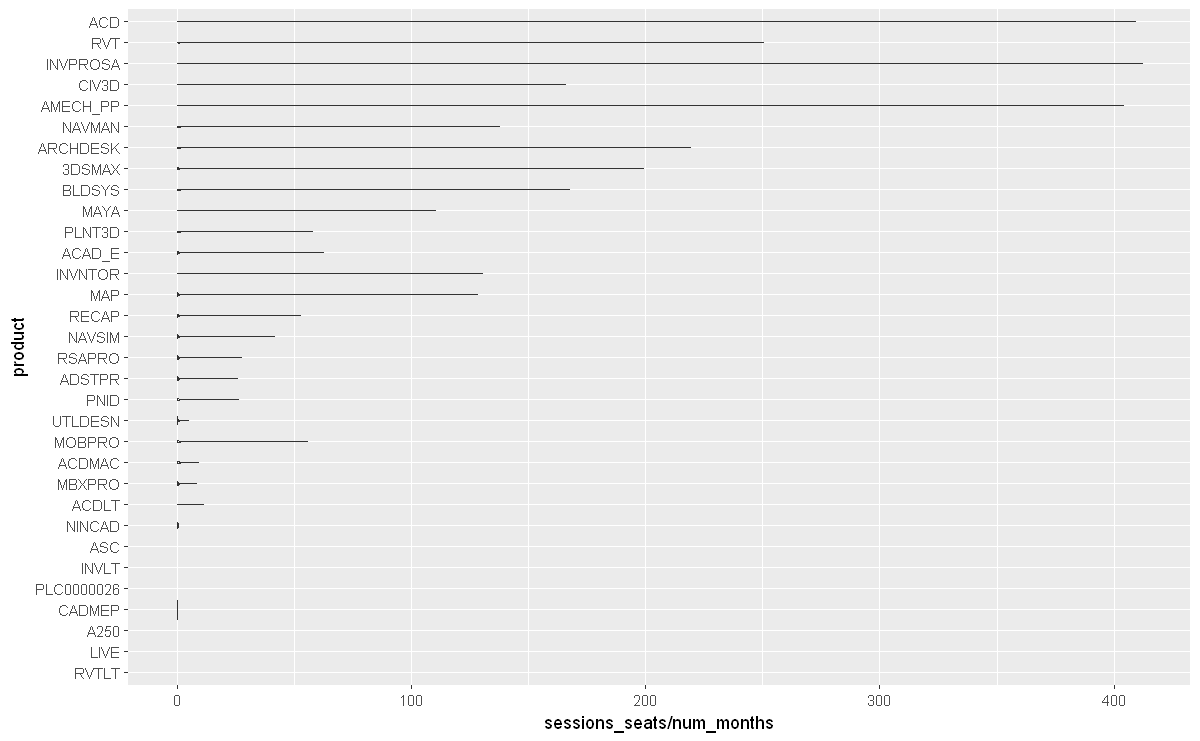

In [30]:
options(repr.plot.width=10, repr.plot.height=10 * 0.618)

#violine plot
product_usage %>%
    #filter(product_line_name == "3DSMAX") %>%
    ggplot(mapping = aes(x =factor(product_line_name,levels = rev(levels(as_factor(as.character(product_popularity$product_line_name))))), y = sessions_seats/num_months)) +
    geom_violin(scale = "area") +
    coord_flip() +
    labs(x = "product") 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


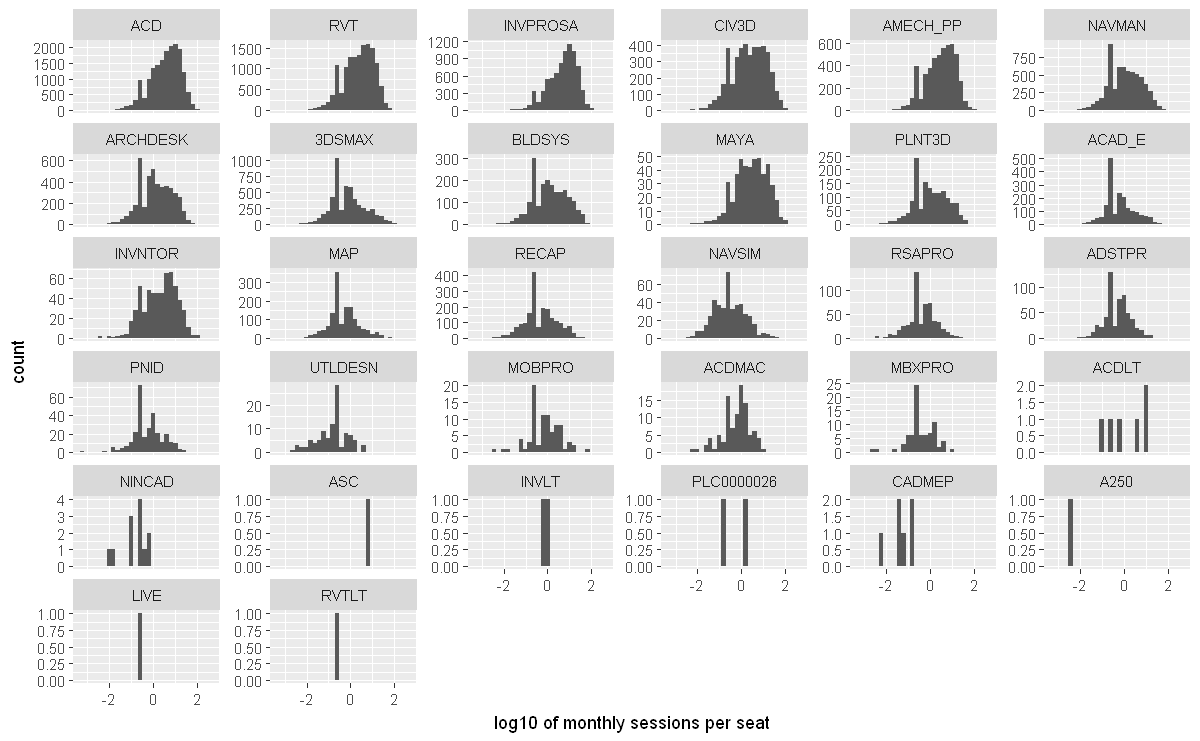

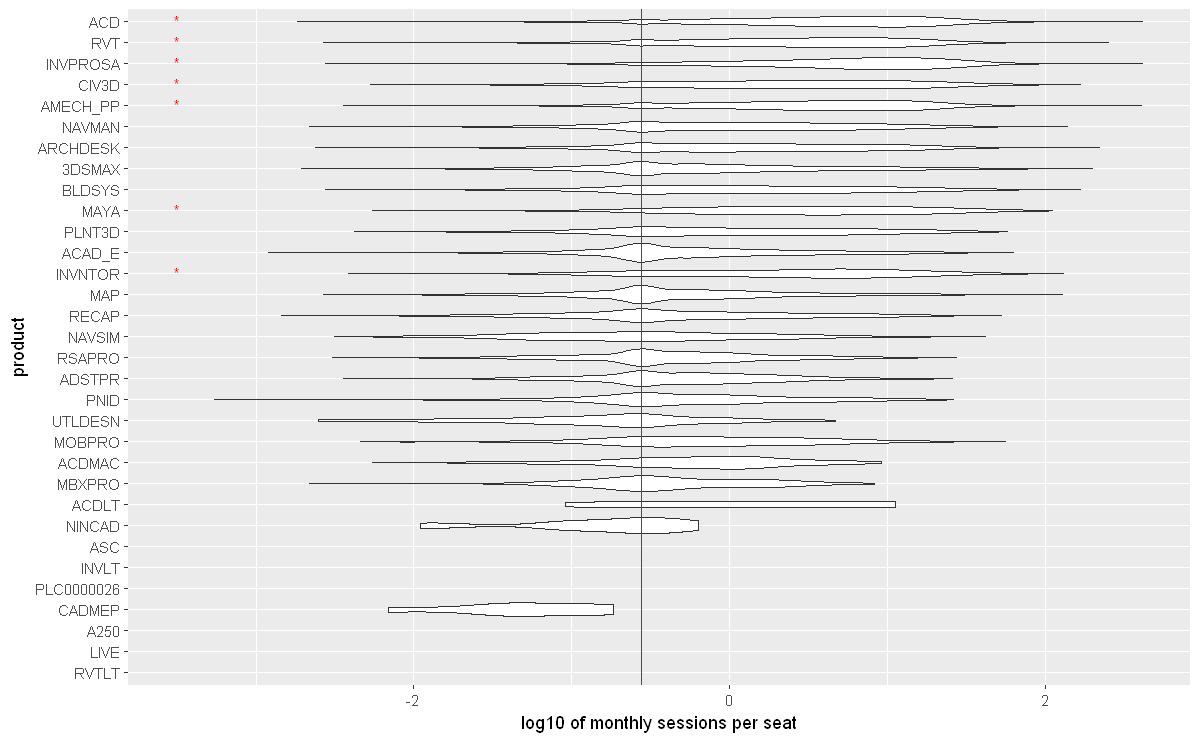

In [31]:
#log scale histogram
product_usage %>%
    #filter(product_line_name == "3DSMAX") %>%
    ggplot(mapping = aes(x = log10(sessions_seats/num_months))) +
    geom_histogram() +
    facet_wrap(~factor(product_line_name,levels = levels(as_factor(as.character(product_popularity$product_line_name)))),scales="free_y") +
    labs(x ="log10 of monthly sessions per seat")

#log scale violine plot
product_usage %>%
    #filter(product_line_name == "3DSMAX") %>%
    ggplot(mapping = aes(x =factor(product_line_name,levels = rev(levels(as_factor(as.character(product_popularity$product_line_name))))), y = log10(sessions_seats/num_months))) +
    geom_violin(scale = "area") +
    coord_flip() +
    geom_hline(yintercept =  -0.56, color = "red") +
    geom_text(mapping = aes(x = x,y = y,label = "*"),data = tibble(x = c("ACD","RVT","INVPROSA","CIV3D","AMECH_PP","MAYA","INVNTOR"),y = -3.5),color = "red") +
    labs(x = "product", y = "log10 of monthly sessions per seat") 

**ACD,RVT,INVPROSA,CIV3D,AMECH_PP,MAYA,INVNTOR** are similar, companies use them more frequently  

Though **MAYA** and **INVNTOR** are not as popular as the other products, companies have similar usage over these two products in terms of frequency of usage